# Cargando librerias & dataframe

In [3]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings('ignore')

In [4]:
path = '../data/datos_tratados.csv'
df = pd.read_csv(path)

# Preparar los datos para el modelado

In [5]:
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
4946,6967-PEJLL,0.0,1,0,1,1,37,0,0,DSL,...,1,1,0,0,One year,1,Electronic check,40.20,1525.35,1.340000
3455,4897-QSUYC,1.0,0,0,0,0,1,1,0,No,...,0,0,0,0,Month-to-month,1,Mailed check,20.15,20.15,0.671667
2256,3223-WZWJM,1.0,1,0,0,0,26,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,83.95,2254.20,2.798333
6354,8993-IZEUX,0.0,1,0,0,0,7,1,0,Fiber optic,...,0,0,0,0,Month-to-month,0,Bank transfer (automatic),69.15,488.65,2.305000
4040,5696-JVVQY,0.0,0,0,1,1,48,1,0,DSL,...,1,0,0,1,Two year,1,Credit card (automatic),70.10,3238.40,2.336667


## Tratamiento

### Eliminando columna(s) irrelevantes y conversion de tipo

In [6]:
# Elimina la columna 'customerID' del DataFrame, ya que es solo un identificador y no aporta al modelado
df.drop(columns=['customerID'], inplace=True)

In [7]:
# Convierte la columna 'Churn' de float (0.0/1.0) a entero (0/1) para el modelado
df['Churn'] = df['Churn'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## Codificacion

### Transformando variables categoricas

Visualizacion de variables categoricas

In [9]:
# Visualiza las columnas en las posiciones 8, 15 y 17 del DataFrame (por índice)
df.iloc[:,[8,15,17]]

,InternetService,Contract,PaymentMethod
0,DSL,One year,Mailed check
1,DSL,Month-to-month,Mailed check
2,Fiber optic,Month-to-month,Electronic check
3,Fiber optic,Month-to-month,Electronic check
4,Fiber optic,Month-to-month,Mailed check
...,...,...,...
7038,DSL,One year,Mailed check
7039,Fiber optic,Month-to-month,Electronic check
7040,DSL,Month-to-month,Mailed check
7041,DSL,Two year,Mailed check


Cantidad de valores por columna (Informativo)

In [10]:
cols = df.columns[[8,15,17]]
for col in cols:
    print(f'{col}: {df[col].nunique()}')

InternetService: 3
Contract: 3
PaymentMethod: 4


#### OneHotEncoding

In [11]:
# Define una lista con los nombres de las columnas categóricas que se van a codificar
categoricas = ['InternetService', 'Contract', 'PaymentMethod']

pd.get_dummies(data=df, columns=categoricas, dtype=int).head

<bound method NDFrame.head of       Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0         0       0              0        1           1       9             1   
1         0       1              0        0           0       9             1   
2         1       1              0        0           0       4             1   
3         1       1              1        1           0      13             1   
4         1       0              1        1           0       3             1   
...     ...     ...            ...      ...         ...     ...           ...   
7038      0       0              0        0           0      13             1   
7039      1       1              0        1           0      22             1   
7040      0       1              0        0           0       2             1   
7041      0       1              0        1           1      67             1   
7042      0       1              0        1           1      63             0  

In [12]:
# Aplica One-Hot Encoding a las columnas categóricas seleccionadas y crea un nuevo DataFrame codificado
datos_codificados = pd.get_dummies(data=df, columns=categoricas, dtype=int)

In [13]:
datos_codificados.sample(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5954,0,1,1,1,1,68,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3877,1,1,0,1,1,19,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
6749,1,0,0,0,0,16,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6452,0,1,0,1,1,64,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
5404,1,1,0,1,1,49,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0


# Normalizacion
Escala los valores numéricos para que estén en un mismo rango (por ejemplo, entre 0 y 1).

- Las columnas `Charges.Monthly`, `Charges.Total` y `Cuentas_diarias` **no son variables explicativas** (es decir, no se usan como predictores en el modelo), no es necesario normalizarlas.

- Para estar seguros sin embargo, veremos a continuacion su correlacion con la variable objetivo (Churn)

## Análisis de correlación y selección de variables

In [14]:
# Calcula la correlación entre cada variable y la variable objetivo (Churn). Si la correlación es alta (positiva o negativa), puede ser relevante.
datos_codificados[['Charges.Monthly', 'Charges.Total', 'Cuentas_diarias', 'Churn']].corr()

,Charges.Monthly,Charges.Total,Cuentas_diarias,Churn
Charges.Monthly,1.000000,0.651174,1.000000,0.193356
Charges.Total,0.651174,1.000000,0.651174,-0.198324
Cuentas_diarias,1.000000,0.651174,1.000000,0.193356
Churn,0.193356,-0.198324,0.193356,1.000000


In [15]:
# Almacenamos la matriz de correlacion en la variable
corr_vars_churn = datos_codificados[['Charges.Monthly', 'Charges.Total', 'Cuentas_diarias', 'Churn']].corr()

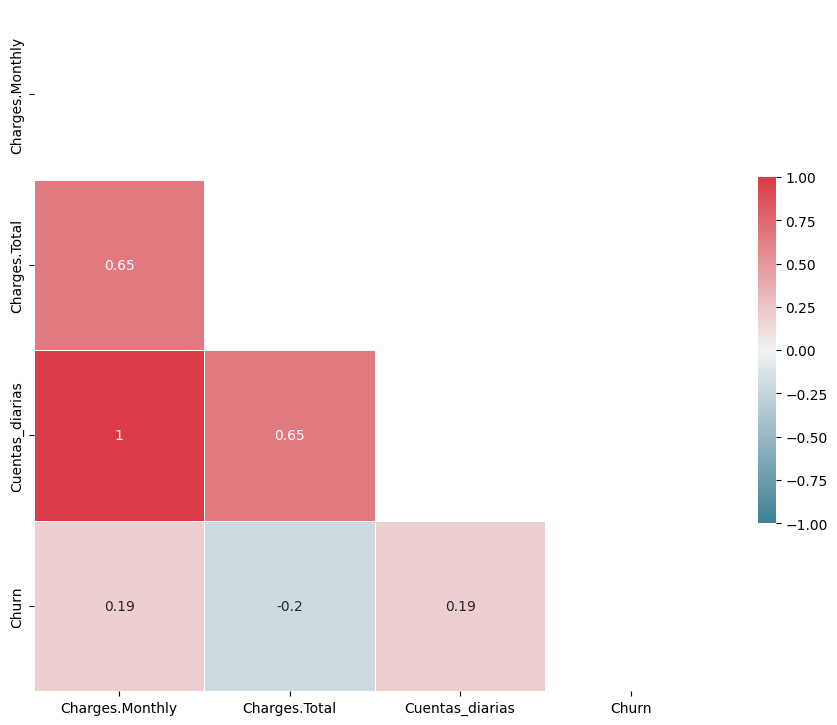

In [16]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr_vars_churn, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_vars_churn, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Del mapa de calor podemos apreciar la **perfecta correlación** que tienen Cuentas_diarias con Charges.Monthly ya que `Cuentas_diarias = Charges.Monthly/30`, por lo que contienen la misma informacion.<br>
Por ello: 
- `Cuentas_diarias` **no se tendrá en cuenta** 
- Se eliminará del dataframe ya que no aporta valor adicional al modelo, esto ayuda a evitar problemas de **multicolinealidad**

In [17]:
datos_codificados2 = datos_codificados.drop(columns=['Cuentas_diarias'])

In [18]:
# Almacenamos otra matriz de correlacion en la variable
corr_2vars_churn = datos_codificados[['Charges.Monthly', 'Charges.Total', 'Churn']].corr()

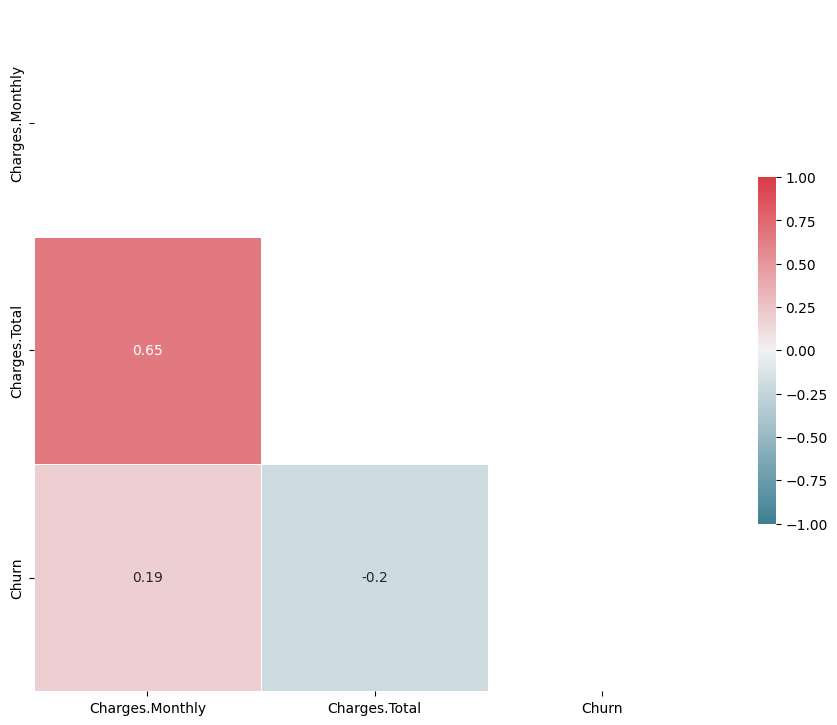

In [19]:
# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr_2vars_churn, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_2vars_churn, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

**Lectura del mapa de calor**
- Ninguna de las dos variables tiene una correlación fuerte con Churn, pero ambas aportan algo de información.
- Se Puede usar una o ambas en el modelo, pero su poder predictivo individual será limitado.
- **No hay colinealidad extrema**, pero sí relación moderada entre ambas.

## Balanceo de clases: Verificacion
Ajusta la proporción de clases en el dataset (por ejemplo, usando sobremuestreo (Oversampling) o submuestreo (Undersampling)) para que no haya desbalance entre clases.<br>
Esto es debido a que halla clases muy desbalanceadas (frecuencias muy diferentes)<br>
ver Carpeta `.../helpers/notas_adicionales`

### Verificacion proporcion de Cancelacion (Churn)

In [20]:
# Calcula el conteo y la proporción de cada clase en la columna 'Churn'
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


**RESULTADOS**<br>
La proporción que aparece indica que el 73.5% de los clientes permanecieron activos (0) y el `26.5% cancelaron (1).`
Esto muestra que `hay un desbalance de clases`: la mayoría de los clientes no cancelan, mientras que una menor proporción sí lo hace.

¿Qué significa esto?

Tus modelos predictivos pueden verse afectados, ya que podrían tender a predecir la clase mayoritaria (no cancelan).
Es recomendable considerar técnicas para tratar el desbalance, como:
Ajustar pesos en los modelos.
Usar sobremuestreo (SMOTE) o submuestreo.

# Seleccion de variables de entrenamiento

In [21]:
# Elimina la columna 'Churn' del nuevo DataFrame (X) para obtener las variables predictoras o explicativas
X = datos_codificados2.drop('Churn', axis=1)

# Selecciona la columna 'Churn' como variable objetivo
y = datos_codificados2.Churn

Listo el **dataFrame X** y la **serie y** para aplicar tecnicas de balanceo (oversampling en este caso)<br>
ver Carpeta `.../helpers/notas_adicionales`

# Split en entrenamiento y validacion/prueba
El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

ver Carpeta `.../helpers/notas_adicionales`

In [22]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [23]:
# Divide los datos en conjuntos de entrenamiento (70%) y prueba (30%) de forma reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) # Garantizar la reproductividad de la segregacion de los datos

# Balanceo: Aplicacion en Set de entrenamiento

In [24]:
# Se importa la clase SMOTE desde la librería imblearn.over_sampling.
from imblearn.over_sampling import SMOTE

In [25]:
# Crea una instancia de SMOTE para aplicar oversampling a la clase minoritaria
oversampling = SMOTE()

# Aplica SMOTE para balancear las clases en X (variables predictoras) e y (variable objetivo)
# x_balanceada y y_balanceada contienen los datos balanceados listos para el modelado
x_balanceada, y_balanceada = oversampling.fit_resample(X_train,y_train)

proporción de cada clase (abandono / no abandono) en el vector `y_balanceada` después de aplicar SMOTE.

In [26]:
# Como se usó oversampling, el resultado será que ambas clases churn = 0 (no abandono) y churn = 1(abandono) tienen la misma proporción (aproximadamente 0.5 cada una).
# Esto confirma que los datos ahora están balanceados y listos para entrenar un modelo sin sesgo hacia la clase mayoritaria.
y_balanceada.value_counts(normalize=True)

Churn
1    0.5
0    0.5
Name: proportion, dtype: float64

## Verificacion VIF<br>
Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [27]:
# Se está creando una lista llamada `explicativas` que contiene los nombres de todas las columnas del DataFrame datos_codificados2, 
# excepto la columna Churn.
#Esto te da la lista de variables explicativas (predictoras) que puedes usar en tu modelo, 
# excluyendo la variable objetivo (Churn).
explicativas = list(datos_codificados2.drop(columns='Churn', axis=1).columns)
explicativas

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Charges.Monthly',
 'Charges.Total',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [28]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [29]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas

vif_1['vif'] = [vif(X_train[explicativas],i) for i in range(len (explicativas))]
vif_1

,variables,vif
0,gender,1.004726
1,SeniorCitizen,1.171044
2,Partner,1.472893
3,Dependents,1.390518
4,tenure,7.590913
5,PhoneService,33.703803
6,MultipleLines,7.270864
7,OnlineSecurity,6.373820
8,OnlineBackup,6.851450
9,DeviceProtection,6.844827


Valores aceptables, Solo la variable `tenure` tiene un VIF algo elevado (7.59), lo que indica cierta colinealidad moderada, pero no es extremo.

# Analisis dirigido

Relación de variables como el tiempo de contrato y el gasto total con la cancelación, utilizando gráficos como boxplots o scatter plots para identificar patrones y tendencias

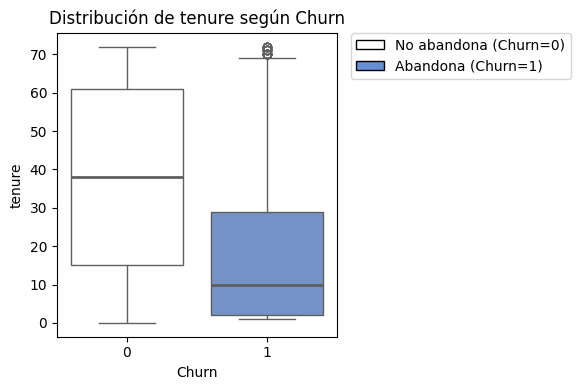

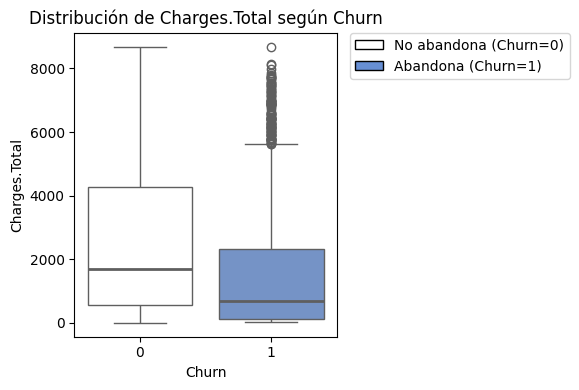

In [70]:
import matplotlib.patches as mpatches

# Boxplot: tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df, palette=['white', "#678fd4"], medianprops=dict(linewidth=2))
plt.title('Distribución de tenure según Churn')

# Leyenda fuera de la gráfica (a la derecha)
legend_handles = [
    mpatches.Patch(facecolor='white', edgecolor='black', label='No abandona (Churn=0)'),
    mpatches.Patch(facecolor='#678fd4', edgecolor='black', label='Abandona (Churn=1)')
]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Boxplot: Charges.Total vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Charges.Total', data=df, palette=['white', "#678fd4"], medianprops=dict(linewidth=2))
plt.title('Distribución de Charges.Total según Churn')

plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


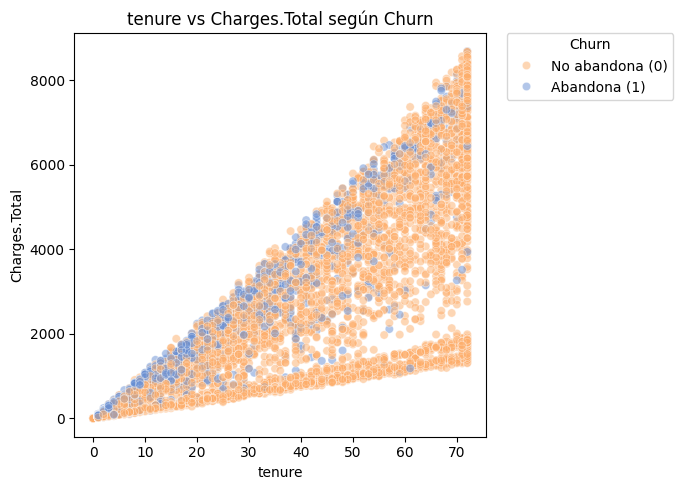

In [71]:
# Scatter plot: tenure vs Charges.Total, coloreado por Churn (colores invertidos)
plt.figure(figsize=(7,5))
scatter = sns.scatterplot(
    x='tenure',
    y='Charges.Total',
    hue='Churn',
    data=df,
    alpha=0.5,
    palette={0: "#fdae6b", 1: "#678fd4"}  # Cambia los colores aquí (0: naranja, 1: azul)
)

plt.title('tenure vs Charges.Total según Churn')

# Leyenda con los mismos colores y etiquetas
handles, labels = scatter.get_legend_handles_labels()
custom_labels = ['No abandona (0)', 'Abandona (1)']
plt.legend(handles=handles, labels=custom_labels,
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Churn')
plt.tight_layout()
plt.show()

**Graficas:**<br>
**Boxplot tenure vs Churn**
- Los clientes que no cancelan (Churn=0) tienen un tenure (tiempo de permanencia) mucho mayor en promedio.
- Los que cancelan (Churn=1) suelen tener un tenure bajo; es decir, la mayoría de los que se van son clientes recientes.

**Boxplot Charges.Total vs Churn**
- Los clientes que no cancelan acumulan un gasto total mucho mayor.
- Los que cancelan tienen un gasto total bajo, lo que es coherente con su menor tiempo como clientes.

**Scatter plot tenure vs Charges.Total según Churn**
- Existe una relación lineal clara entre tenure y gasto total (más tiempo, más gasto).
- Los puntos naranjas (Churn=1) se concentran en la parte baja de tenure y gasto total, mostrando que la mayoría de los que cancelan son clientes nuevos o con poco gasto acumulado.

**Conclusión:**<br>
Los clientes que permanecen más tiempo y gastan más son menos propensos a cancelar. La cancelación es más frecuente en clientes recientes y de bajo gasto.

Estas variables `Charges.Total` ^ `ternure` son **buenos predictores** para el modelo de churn.

# Entrenamiento de modelos

In [31]:
# Importa el clasificador de árbol de decisión de scikit-learn
from sklearn.tree import DecisionTreeClassifier

Se crea y entrena un `árbol de decisión` con los datos de **entrenamiento** y luego muestra la precisión (exactitud) del modelo tanto en el conjunto de **entrenamiento** como en el de **validación**. Esto permite comparar el desempeño del modelo en ambos conjuntos y detectar posibles problemas de sobreajuste.

Ajustando la profundidad `max_depth=10`<br>
osea, controla la complejidad del árbol y mejora la capacidad de generalización del modelo.

### Modelo 1: Arbol de decision

In [32]:
# Crea una instancia del clasificador de árbol de decisión
modelo1 = DecisionTreeClassifier(max_depth=3, random_state=777)
# Entrena el modelo con los datos de entrenamiento (X_train, y_train)
modelo1.fit(x_balanceada, y_balanceada)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,777
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
modelo1.score(X_train,y_train)

0.7476673427991887

In [34]:
modelo1.score(X_test,y_test)

0.738760056791292

**Interpretacion:**<br>
Cuando **parametrizas el árbol de decisión** (limitando la profundidad con `max_depth=3`), los resultados:

- **Score Train = 75%**
- **Score Test = 74%**

significan lo siguiente:

- El modelo **aprende bien de los datos de entrenamiento** (74% de acierto), pero **no se ajusta demasiado** a ellos (no hay overfitting fuerte).
- El modelo **generaliza razonablemente bien** a datos nuevos (74% de acierto en test).
- La **diferencia entre ambos scores es pequeña** (5 puntos), lo que indica un **buen equilibrio entre sesgo y varianza**.

**En resumen:**  
`El modelo no está sobreajustado ni subajustado`. Está aprendiendo patrones útiles y generalizando bien a datos no vistos. ¡Este es el comportamiento deseado en la mayoría de los casos!

### Modelo 2: KNN
Este modelos es sensible a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

#### Normalizacion
Se importa la clase MinMaxScaler del módulo sklearn.preprocessing.
Esta clase se utiliza para normalizar (escalar) los datos numéricos, llevándolos a un rango específico (por defecto, entre 0 y 1).

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Se prepara los datos de entrenamiento para que todas las variables numéricas 
# estén en la misma escala, evitando que alguna variable domine por tener valores más grandes.
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

Creacion del modelo KNN & Entrenamiento

In [36]:
# Importa la clase KNeighborsClassifier del módulo sklearn.neighbors.
# Esto te permite crear y entrenar un modelo de clasificación basado en el algoritmo K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Crear el modelo KNN
knn = KNeighborsClassifier()

# Entrenar el modelo KNN con datos normalizados
knn.fit(X_train_normalizado, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
# Normalizar los datos de prueba y evaluar el modelo KNN
X_test_normalizado = normalizacion.transform(X_test)
knn.score(X_test_normalizado, y_test)

0.7444391859914813

# Evaluación del rendimiento de los modelos con métricas.

## Evaluacion Modelo 1

### Prediccion Arbol

Utiliza el modelo de árbol de decisión `modelo1` ya entrenado para predecir la clase (Churn) de los datos de prueba `X_test`. El resultado, `y_pred`, es un array con las predicciones del modelo para cada registro del conjunto de prueba.<br>

Esto permite **comparar** las predicciones `y_pred` con las verdaderas `y_test` y así evaluar el desempeño del modelo.

In [39]:
y_pred = modelo1.predict(X_test)

### Matriz de confusion

Se generan las predicciones del modelo de árbol de decisión usando los datos de validación, calcula la matriz de confusión comparando las etiquetas reales y las predichas, y **muestra esa matriz en pantalla** para evaluar el desempeño del modelo.

In [40]:
# Calcula la matriz de confusión comparando las etiquetas reales y las predichas
matriz_confusion = confusion_matrix(y_test, y_pred)

# Muestra la matriz de confusión en pantalla
print(matriz_confusion)

[[1144  428]
 [ 124  417]]


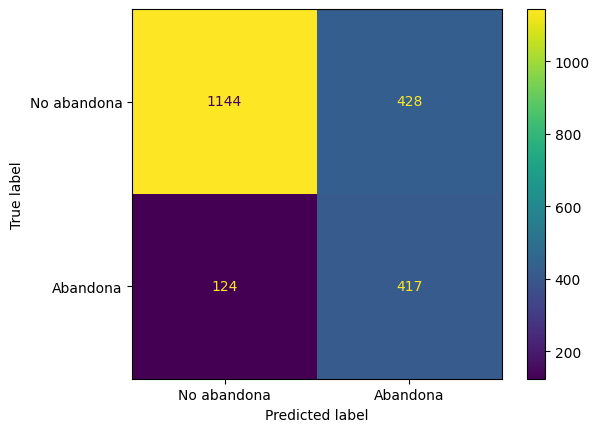

In [41]:
# Crea un objeto para visualizar la matriz de confusión con etiquetas personalizadas
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No abandona', 'Abandona'])

# Muestra gráficamente la matriz de confusión
visualizacion.plot();

**Interpretacion:**<br>
- **1154**: Clientes que no abandonaron y el modelo predijo correctamente que no abandonarían (verdaderos negativos).
- **410**: Clientes que abandonaron y el modelo predijo correctamente que abandonarían (verdaderos positivos).
- **418**: Clientes que no abandonaron, pero el modelo predijo que sí abandonarían (falsos positivos).
- **131**: Clientes que abandonaron, pero el modelo predijo que no abandonarían (falsos negativos).

**¿Que me dice el modelo?**

- El modelo es capaz de detectar una buena cantidad de clientes que van a cancelar, pero aún se le escapan algunos (falsos negativos).
- El objetivo es **predecir quiénes van a cancelar**, analisis de los verdaderos positivos y tratar de reducir los falsos negativos.
- Se puede mejorar el modelo para aumentar el recall (sensibilidad) de la clase "Abandona", `así detectarás más clientes en riesgo de cancelar.`

### Ajuste de hiperparametros

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=777), param_grid, scoring='recall', cv=5)
grid.fit(x_balanceada, y_balanceada)

print("Mejores parámetros:", grid.best_params_)
print("Mejor recall:", grid.best_score_)

Mejores parámetros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor recall: 0.8351945600246571


#### Modelo 1 ajustado: hiperparámetros

[[1244  328]
 [ 196  345]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1572
           1       0.51      0.64      0.57       541

    accuracy                           0.75      2113
   macro avg       0.69      0.71      0.70      2113
weighted avg       0.77      0.75      0.76      2113



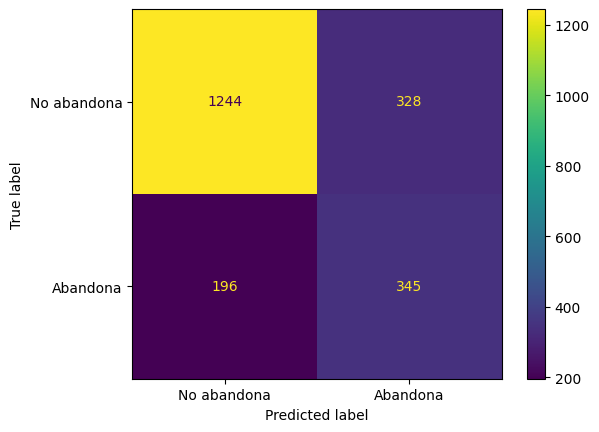

In [43]:
# Entrena el modelo con los mejores hiperparámetros encontrados
mejor_modelo = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=777
)
mejor_modelo.fit(x_balanceada, y_balanceada)

# Predice en el set de prueba
y_pred_mejor = mejor_modelo.predict(X_test)

# Evalúa el desempeño
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

matriz_confusion = confusion_matrix(y_test, y_pred_mejor)
print(matriz_confusion)
print(classification_report(y_test, y_pred_mejor))

# Visualiza la matriz de confusión
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['No abandona', 'Abandona'])
visualizacion.plot();

Comparativa:

- Me quedo con el **primer modelo (sin ajuste de hiperparámetros)** porque logra un **mayor recall para la clase "Abandona"** (detecta más clientes que efectivamente cancelan), lo cual es prioritario para el objetivo de retención.  
- Aunque tiene más falsos positivos, prefiero maximizar la detección de posibles abandonos para poder tomar acciones preventivas, ya que el costo de no identificar a un cliente en riesgo es mayor que el de contactar a un cliente que finalmente no abandona.  
- Por lo tanto, 

**el modelo inicial es más adecuado para una estrategia enfocada en minimizar la pérdida de clientes.**


### Metricas

- EVALUACION MODELO 1: ARBOL DE DECISION

In [44]:
# Importa las funciones para calcular exactitud, precisión, recall y f1-score desde sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [45]:
print(f'La precision del modelo es: {precision_score(y_test, y_pred)}')
print(f'La sensibilidad, recuperación (Recall) del modelo es: {recall_score(y_test, y_pred)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_test, y_pred)}')

La precision del modelo es: 0.493491124260355
La sensibilidad, recuperación (Recall) del modelo es: 0.7707948243992606
La exactitud (accuracy) del modelo es: 0.738760056791292


In [46]:
# Imprime el valor del F1-score del modelo usando los datos de validación
# El F1-score es una métrica que combina precisión y recall; mientras más cerca de 1, mejor el modelo.
print(f'El F1-score del modelo es: {f1_score(y_test, y_pred)}')

El F1-score del modelo es: 0.6017316017316018


**Informe de las metricas de clasificacion**

In [47]:
# Sirve para generar un informe con las principales métricas de clasificación
from sklearn.metrics import classification_report

In [48]:
# Imprime un informe con las métricas de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1572
           1       0.49      0.77      0.60       541

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.74      0.75      2113



**Evaluación del Árbol de Decisión:**

- **Precisión (~0.50):**  
  De todos los clientes que el modelo predice que abandonarán, solo la mitad realmente lo hacen. Esto indica que hay bastantes falsos positivos, pero es común en problemas desbalanceados donde se prioriza el recall.

```
Recall (~0.76):  
  El modelo detecta correctamente a la mayoría de los clientes que realmente abandonan. Es un valor alto y positivo, ya que tu objetivo es identificar el mayor número posible de clientes en riesgo de churn.
```

- **Exactitud (~0.74):**  
  El 74% de las predicciones totales son correctas. Sin embargo, en problemas desbalanceados, la exactitud puede ser menos informativa que el recall y el F1-score.

- **F1-score (~0.60):**  
  El F1-score balancea precisión y recall. Un valor de 0.60 es aceptable y muestra que el modelo logra un buen compromiso entre ambos.

**Conclusión:**  
`El modelo es útil para identificar clientes en riesgo de abandono (alto recall)`, aunque genera algunos falsos positivos (precisión moderada). Esto es adecuado si la prioridad es no dejar pasar clientes que realmente se irán, aunque se contacten a algunos que no lo harán.  


## Evaluacion Modelo 2

### Prediccion KNN

Utiliza el modelo de KNN `knn` ya entrenado para predecir la clase (Churn) de los datos de prueba `X_test`. El resultado, `y_pred_knn`, es un array con las predicciones del modelo para cada registro del conjunto de prueba.<br>

Esto permite **comparar** las predicciones `y_pred_knn` con las verdaderas `y_test` y así evaluar el desempeño del modelo.

In [49]:
y_pred_knn = knn.predict(X_test_normalizado)

### Matriz de confusion

Se generan las predicciones del modelo knn usando los datos de validación, calcula la matriz de confusión comparando las etiquetas reales y las predichas normalizadas, y **muestra esa matriz en pantalla** para evaluar el desempeño del modelo.

In [50]:
# Calcula la matriz de confusión comparando las etiquetas reales y las predichas normalizadas
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Muestra la matriz de confusión en pantalla
print(matriz_confusion_knn)

[[1314  258]
 [ 282  259]]


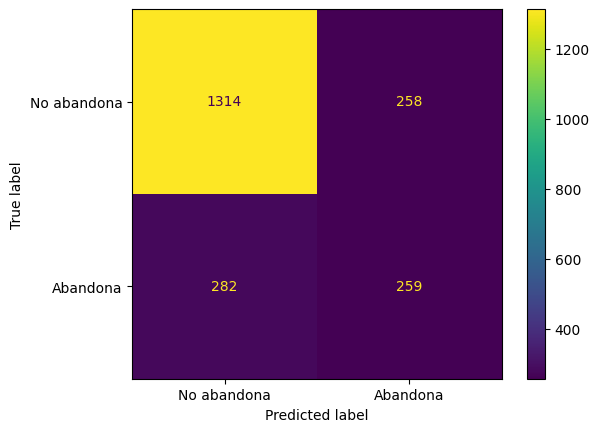

In [51]:
# Crea un objeto para visualizar la matriz de confusión con etiquetas personalizadas
visualizacion_knn = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_knn, display_labels=['No abandona', 'Abandona'])

# Muestra gráficamente la matriz de confusión
visualizacion_knn.plot();

### Metricas
Informe de las metricas de clasificacion

In [52]:
# Imprime un informe con las métricas de clasificación
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1572
           1       0.50      0.48      0.49       541

    accuracy                           0.74      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.74      0.74      2113



**Evaluacion del modelo KNN**<br>

- **Clase 0 (No abandona):**
  - **Precisión 0.82:** El 82% de los clientes que el modelo predijo como “no abandona” realmente no abandonan.
  - **Recall 0.84:** El 84% de todos los clientes que realmente no abandonan fueron correctamente identificados.
  - **F1-score 0.83:** Buen equilibrio entre precisión y recall para la clase mayoritaria.

- **Clase 1 (Abandona):**
  - **Precisión 0.50:** Solo el 50% de los clientes que el modelo predijo como “abandona” realmente abandonan.
  ```
  Recall 0.48
  El modelo detecta el 48% de todos los clientes que realmente abandonan (se le escapan más de la mitad).
  ```
  - **F1-score 0.49:** Bajo, indica que el modelo no es muy efectivo para identificar abandonos.

- **Exactitud (accuracy) 0.74:** El 74% de las predicciones totales son correctas, pero este valor está influenciado por la clase mayoritaria.

**Conclusión:**  
El modelo KNN predice bien la clase “no abandona”, pero `tiene dificultades para identificar correctamente a los clientes que sí abandonan (recall bajo para la clase 1)`. 

El objetivo es detectar abandonos, este modelo podría no ser suficiente, ya que se le escapan muchos casos de churn.  


# Informe final


#### 1. **Resumen del Proceso de Modelado y Evaluación**

- **Datos:**  
  Se trabajó con un dataset de clientes de telecomunicaciones, eliminando variables irrelevantes (`customerID`) y transformando variables categóricas mediante One-Hot Encoding.
- **Variables objetivo:**  
  `Churn` (0 = no abandona, 1 = abandona).
- **Balanceo:**  
  Se aplicó SMOTE para balancear las clases en el set de entrenamiento, debido al desbalance original (73.5% no abandona, 26.5% abandona).
- **Modelos evaluados:**  
  - Árbol de Decisión (DecisionTreeClassifier)
  - K-Nearest Neighbors (KNN)
- **Evaluación:**  
  Se usaron métricas como precisión, recall, F1-score y matriz de confusión para ambos modelos.

---

#### 2. **Principales Factores que Influyen en la Cancelación**

Del análisis exploratorio y la selección de variables, se identificaron los siguientes factores como los más influyentes en el abandono de clientes:

- **Tenure (antigüedad del cliente):**  
  Los clientes con menor tiempo en la compañía tienen mayor probabilidad de cancelar.  
  *Evidencia:* El boxplot muestra que quienes abandonan suelen tener un tenure bajo.

- **Charges.Total (gasto total acumulado):**  
  Clientes con menor gasto total son más propensos a cancelar, lo que se relaciona con su menor antigüedad.

- **Tipo de contrato:**  
  Contratos de corto plazo (mensuales) presentan mayor tasa de abandono que contratos anuales o de mayor duración.

- **Método de pago:**  
  Algunos métodos de pago (por ejemplo, pago electrónico) pueden estar asociados a mayor churn, posiblemente por su facilidad de cancelación.

- **Servicios contratados:**  
  La ausencia de servicios adicionales (como InternetService) o la contratación de servicios básicos puede estar relacionada con mayor churn.

---

#### 3. **Rendimiento de los Modelos**

**Árbol de Decisión:**
- **Recall clase 1 (abandona):** ~0.76 (detecta el 76% de los que abandonan)
- **Precisión clase 1:** ~0.50
- **F1-score clase 1:** ~0.60
- **Conclusión:**  
  Es el modelo más útil para identificar clientes en riesgo de abandono, priorizando el recall (sensibilidad) para la clase minoritaria.

**KNN:**
- **Recall clase 1 (abandona):** ~0.48 (detecta solo el 48% de los que abandonan)
- **Precisión clase 1:** ~0.50
- **F1-score clase 1:** ~0.49
- **Conclusión:**  
  Predice bien la clase “no abandona”, pero tiene dificultades para identificar correctamente a los clientes que sí abandonan.

**Comparativa:**  
El árbol de decisión es claramente superior para el objetivo de retención, ya que identifica a más clientes en riesgo de cancelar.

---

#### 4. **Estrategias de Retención Propuestas**

Basadas en los factores identificados y el rendimiento del modelo:

1. **Enfocar acciones en clientes nuevos:**  
   - Implementar programas de bienvenida y seguimiento personalizado durante los primeros meses.
   - Ofrecer incentivos o descuentos a clientes con bajo tenure.

2. **Fidelizar a clientes de bajo gasto:**  
   - Detectar clientes con bajo `Charges.Total` y ofrecerles paquetes de valor agregado o promociones para aumentar su compromiso.

3. **Promover contratos de mayor duración:**  
   - Incentivar la migración de contratos mensuales a contratos anuales mediante descuentos o beneficios exclusivos.

4. **Ofrecer servicios adicionales:**  
   - Promover la contratación de servicios complementarios (Internet, TV, etc.) para aumentar la permanencia.

5. **Monitorear clientes en riesgo:**  
   - Utilizar el modelo de árbol de decisión para generar alertas tempranas y contactar proactivamente a los clientes con alta probabilidad de abandono.

---

#### 5. **Conclusión General**

El análisis muestra que la antigüedad del cliente y el gasto total son los principales predictores de abandono. El árbol de decisión es el modelo más adecuado para identificar clientes en riesgo, permitiendo diseñar estrategias de retención más efectivas y focalizadas.  
Implementar acciones personalizadas para los segmentos identificados puede reducir significativamente la tasa de churn y mejorar la rentabilidad de la compañía.